In [3]:
import matplotlib.pyplot as plt     # Importe le module pyplot en plt
import numpy as np                  # Importe la bibliothèque numpy en np
from scipy.stats import linregress
import matplotlib.ticker as ticker
from IPython.display import display, HTML

# Principe du radar de recul

## I. Célérité des ultrasons dans l'air
### 1. Mesures

In [2]:
from IPython.display import HTML, display
from web_sciences import get_interface

my_init = '''
mode = "point";
var commandes = [{texte_bouton:"Mesure", arduino:"mesure"}];
series = [{grandeur: "Δt", unite: "µs"}];
titre_graphe = "Célérité des ultrasons dans l'air";
axes = [{grandeur: "d", unite: "cm"}, {grandeur: "Δt", unite: "µs"}];
tableau_masjuscule = true;
tableur = true;
'''

S = get_interface(my_init)
display(HTML(S))

### 2. Exploitation

#### a. Saisie des mesures et évaluation des incertitudes

In [1]:
# mesures obtenues
# copier ci-dessous les tableaux de valeurs donnés par le notebook ultrasons_mesures
D = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
ΔT = [520.0, 800.0, 1108.0, 1420.0, 1716.0, 1996.0, 2276.0, 2576.0, 2876.0, 3140.0, 3352.0]

'''
D = [10, 20, 30, 40, 50, 60, 70, 80, 90]
ΔT = [576, 1.18e+3, 1.75e+3, 2.30e+3, 2.90e+3, 3.46e+3, 4.04e+3, 4.67e+3, 5.25e+3]
'''

# distance (m)
D = [d * 1e-2 for d in D]
# durée (s)
ΔT = [δt * 1e-6 for δt in ΔT]
# incertitudes sur d
D_ErrorValues = [1e-2 for valeur in D]
# incertitudes sur t
T_ErrorValues = [100e-6 for valeur in ΔT]

#### b. Paramétrage du graphique et choix des grandeurs placées en abscisse et en ordonnée

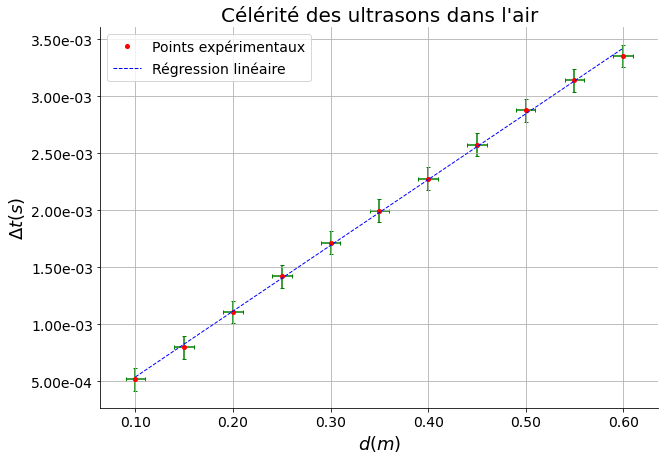

In [4]:
# calcul du modèle
Modele = linregress(D, ΔT)
m, p = Modele[0], Modele[1]
T_modele = [m*d+p for d in D]
plt.figure("Célérité des ultrasons", figsize=(10, 7))# Initialise la figure
plt.title("Célérité des ultrasons dans l'air",fontsize = 20)# Titre du graphe
plt.xlabel('$d (m)$',fontsize = 18)         # Label de l’axe des abscisses
plt.ylabel('$\Delta t (s)$',fontsize = 18)         # Label de l’axe des ordonnées
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2e'))
plt.xticks(fontsize=14)
plt.ticklabel_format(axis='x')
plt.ticklabel_format(axis='y')
plt.yticks(fontsize=14)
T_abscisse = D
T_ordonnee = ΔT
plt.plot(T_abscisse, T_ordonnee, 'r.', ms=8, label='Points expérimentaux') # Points expérimentaux
plt.plot(T_abscisse, T_modele, 'b--', label='Régression linéaire', lw=1)
plt.errorbar(T_abscisse, T_ordonnee, xerr = D_ErrorValues, yerr = T_ErrorValues, fmt = 'none',
             capsize = 2, ecolor = 'green', zorder = 1)
plt.grid()
plt.legend(fontsize=14)
plt.show()
# Affichage de la modélisation
m_t = '$m = '+str.replace('{:.2e}'.format(m),'e',' \\times 10^{').replace('.',',')+'}~s.m^{-1}$'
s = 'Modélisation de la droite : $\\Delta t = m \\times d$ avec {}'.format(m_t)
display(HTML(s))

#### 3. Détermination de la célérité des ultrasons

$\Delta t = m \times d$

or

$2 \times d = v \times \Delta t$ soit $\Delta t = \dfrac{2}{V} \times d$

$
\begin{cases} 
\Delta t = m \times d \\
\Delta t = \dfrac{2}{V} \times d
\end{cases}
$

On en déduit $m = \dfrac{2} {v}$ et $v = \dfrac{2} {m}$ 

In [ ]:
v = 2/m
print('v = {:.1f} m.s-1'.format(v))

## II. Application au Radar de recul
### 1. Cahier des charges
On souhaite utiliser la plaquette pour fabriquer un radar de recul. Le cahier des charges est le suivant :

- Lorsque le radar est situé à plus d’un mètre de l’obstacle :
    - la del verte doit être allumée et la del rouge doit être éteinte
    - le buzzer ne doit émettre aucun son
- Lorsque le radar est situé entre 50 cm et 1,00 m de l’obstacle :
    - la del verte doit être allumée et la del rouge doit être éteinte
    - le buzzer doit émettre un bip toutes les 300 ms
- Lorsque le radar est situé à moins de 50 cm de l’obstacle :
    - la del verte doit être éteinte et la del rouge doit être allumée
    - le buzzer doit émettre un bip toutes les 125 ms

### 2. Manipulation

Compléter le programme _programme_2.ino_ de façon à répondre au cahier des charges puis téléverser le sur la maquette

```c
const float VITESSE_SON = 340.0;               // Vitesse du son en m/s
const int pin_Trigger = 4;
const int TIMEOUT = (6/VITESSE_SON)*1e6;       // TIMEOUT en µs (pour 6,0m aller/retour)
const int pin_led_verte = 3;
const int pin_led_rouge = 4;
const int pin_buzzer = 2;

/* Renvoie la distance mesurée en cm */
float getDistance() {
  unsigned long temps1;
  unsigned long duree_ar;
  pinMode(pin_Trigger, OUTPUT);
  digitalWrite(pin_Trigger, HIGH);
  delayMicroseconds(10);
  digitalWrite(pin_Trigger, LOW);
  pinMode(pin_Trigger, INPUT);
  while (digitalRead(pin_Trigger) == LOW) { }
  temps1 = micros();
  while (digitalRead(pin_Trigger) == HIGH and micros() - temps1 < TIMEOUT) { }
  // durée aller retour en mètres
  duree_ar = micros() - temps1;
   // Distance en mètres
  float distance = duree_ar*1e-6 * VITESSE_SON / 2; 
  return distance;
}

void setup() {
  pinMode(pin_Trigger, OUTPUT);
  pinMode(pin_buzzer, OUTPUT);
  pinMode(pin_led_rouge, OUTPUT);
  pinMode(pin_led_verte, OUTPUT);
  Serial.begin(9600);
  delay(1);
}

void loop() {
    float distance;
    distance = getDistance(); 
    /* distance inférieure à 50cm */
    if(distance < 0.50) {
      digitalWrite(pin_led_rouge, HIGH);
      digitalWrite(pin_led_verte, LOW);
      tone(pin_buzzer,600,125);
      delay(125);
    }
    /* distance comprise entre 0.50m et 1.0m*/
    else if(distance < 1.0) {
      digitalWrite(pin_led_rouge, LOW);
      digitalWrite(pin_led_verte, HIGH);
      tone(pin_buzzer,600,125);
      delay(300);
    }
    else {
      /* distance supérieure à 1.0m*/
      digitalWrite(pin_led_rouge, LOW);
      digitalWrite(pin_led_verte, HIGH);
      delay(125);
    }
}

```